# Dilution series and data aggregation
## Phil Wilmarth
### OHSU PSR Core
### February, 2018
<br>
## Compare PSM, peptide, and protein data scatter
This is a complex mouse brain mixture, digested, labeled with 6 TMT reagents, and mixed in a series of dilutions. The relative volume amounts were in these proportions:  25 : 20 : 15 : 10 : 5 : 2.5. The biological sample was from the Gail Mandel lab at OHSU.

The data were generated on a Thermo Fusion using the SPS MS3 method. The peptide identifications and reporter ion intensities were generated using an in-house pipeline with Comet as the search engine. The PAW pipeline does a direct processing of the RAW files to extract MS2 scans for Comet and the reporter ions from the corresponding MS3 scans. Comet results are filtered using a target/decoy strategy with accurate mass conditional score histograms. Basic parsimony logic is used to generate protein and peptide reports.

> Eng, J.K., Jahan, T.A. and Hoopmann, M.R., 2013. Comet: an open‐source MS/MS sequence database search tool. Proteomics, 13(1), pp.22-24.

> Chambers, M.C., Maclean, B., Burke, R., Amodei, D., Ruderman, D.L., Neumann, S., Gatto, L., Fischer, B., Pratt, B., Egertson, J. and Hoff, K., 2012. A cross-platform toolkit for mass spectrometry and proteomics. Nature biotechnology, 30(10), p.918.

> Wilmarth, P.A., Riviere, M.A. and David, L.L., 2009. Techniques for accurate protein identification in shotgun proteomic studies of human, mouse, bovine, and chicken lenses. Journal of ocular biology, diseases, and informatics, 2(4), pp.223-234.

> The protein grouping algorithm is described here:
https://digitalcommons.ohsu.edu/etd/3855/

An additional protein grouping algorithm is also employed to group protein families having large fractions of identical common peptides. The final list of proteins is used as the context for shared and unique peptide determinations. Only unique peptides in that context are used in the TMT quantification. All unique PSM reporter ions are summed into protein intensity totals for each channel. We will compare some properties of the reporter ions at the PSM level, the peptide level (combined copies and charge states), and the protein level. 

Read in the CSV files, extract the 6 columns, and see what the data in each column looks like.

In [1]:
# comparing peptide intensities to protein intensities
# load libraries
library(tidyverse)
library(limma)

# Set up to select the proper columns and label them
keep <- c(1, 2, 5, 6, 9, 10)
labels = c("a_25", "b_20", "c_15", "d_10", "e_5", "f_2.5")

# read in the three datasets, keep the 6 columns, and set labels
# PSMs
psm_start <- read_csv("psm_tmt.csv")
psm_start <- psm_start[keep]
colnames(psm_start) <- labels
# PAW Grouped peptides
peptide_start <- read_csv("grouped_peptide_summary_TMT_8.csv")
peptide_start <- peptide_start[keep]
colnames(peptide_start) <- labels
# PAW grouped proteins
protein_start <- read_csv("grouped_protein_summary_TMT_8.csv")
protein_start <- protein_start[keep]
colnames(protein_start) <- labels

# filter out rows with any missing data points and see how many rows remain
psms <- psm_start[apply(psm_start, 1, function(x) all(x > 0)), ] 
print("PSMs (before and after):")
dim(psm_start)[1]; dim(psms)[1]
peptides <- peptide_start[apply(peptide_start, 1, function(x) all(x > 0)), ] 
print("Peptides (before and after):")
dim(peptide_start)[1]; dim(peptides)[1]
proteins <- protein_start[apply(protein_start, 1, function(x) all(x > 0)), ] 
print("Proteins (before and after):")
dim(protein_start)[1]; dim(proteins)[1]

# check column sums
format(round(colSums(psms), digits = 0), big.mark = ",")
format(round(colSums(peptides), digits = 0), big.mark = ",")
format(round(colSums(proteins), digits = 0), big.mark = ",")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  height_126 = col_double(),
  height_127_N = col_double(),
  height_127_C = col_double(),
  height_128_N = col_double(),
  height_128_C = col_double(),
  height_129_N = col_double(),
  height_129_C = col_double(),
  height_130_N = col_double(),
  height_130_C = col_double(),
  height_131 = col_double()
)
Parsed with column specification:
cols(
  TotInt_126C_MAN1353 = col_double(),
  TotInt_127N_MAN1353 = col_double(),
  TotInt_127C_MAN1353 = col_double(),
  TotInt_128N_MAN1353 = col_double(),
  TotInt_128C_MAN1353 = col_double(),
  TotInt_129N_MAN1353 = col_double(),
  

[1] "PSMs (before and after):"


[1] 216103

[1] 59698

[1] "Peptides (before and after):"


[1] 28799

[1] 20632

[1] "Proteins (before and after):"


[1] 2781

[1] 2689

a_25            b_20            c_15            d_10             e_5 
"3,827,241,213" "3,088,914,690" "2,363,152,704" "1,665,392,787" "  778,998,204" 
          f_2.5 
"  434,946,648"

a_25            b_20            c_15            d_10             e_5 
"1,989,609,572" "1,555,232,467" "1,202,832,977" "  831,759,502" "  400,962,779" 
          f_2.5 
"  222,664,615"

a_25            b_20            c_15            d_10             e_5 
"2,006,316,227" "1,570,213,930" "1,213,599,512" "  839,401,807" "  402,884,998" 
          f_2.5 
"  222,698,996"

## We can look at the intensity distributions
The low intensity drop out ("notch") in the PSMs and peptides has been noticed previously:

> Hughes, C.S., Zhu, C., Spicer, V., Krokhin, O.V. and Morin, G.B., 2017. Evaluating the Characteristics of Reporter Ion Signal Acquired in the Orbitrap Analyzer for Isobaric Mass Tag Proteome Quantification Experiments. Journal of proteome research, 16(5), pp.1831-1838.

The low bump in the proteins is from the zero-replacement value of 50.

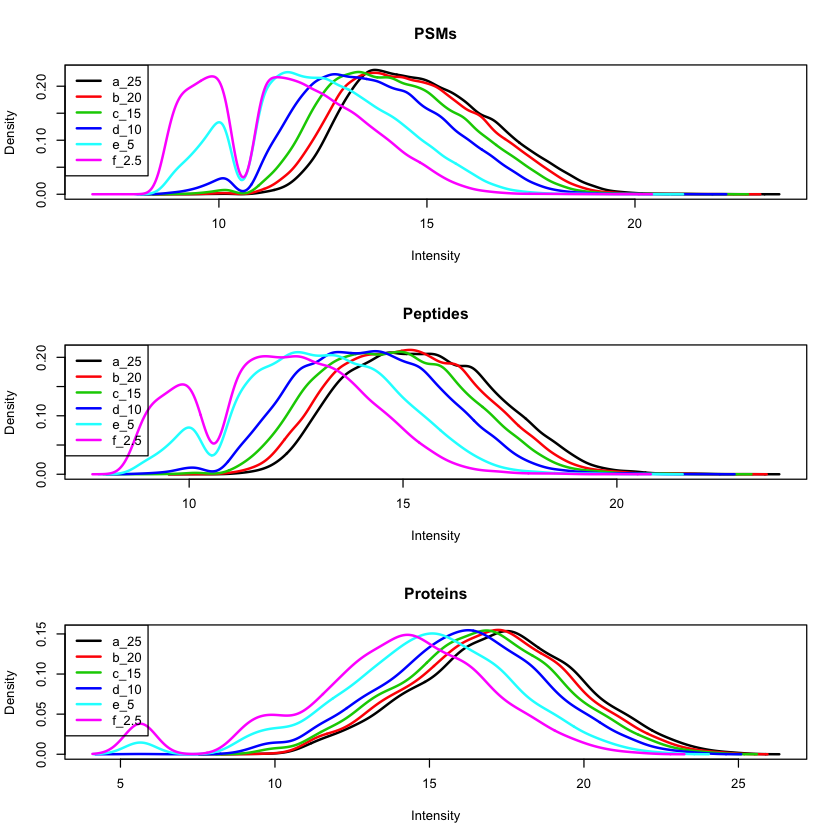

In [2]:
# compare some intensity (peak heights) distributions
par(mfrow = c(3, 1))
plotDensities(log2(psms), main = "PSMs")
plotDensities(log2(peptides), main = "Peptides")
plotDensities(log2(proteins), main = "Proteins")
par(mfrow = c(1, 1))

## And summarize the data in each column

In [3]:
# see what we have in the columns at each level of aggregation
print("PSMs:")
summary(psms)
print("Peptides:")
summary(peptides)
print("Proteins")
summary(proteins)

[1] "PSMs:"


      a_25              b_20              c_15              d_10        
 Min.   :    480   Min.   :    420   Min.   :    394   Min.   :    374  
 1st Qu.:  12889   1st Qu.:  10808   1st Qu.:   8129   1st Qu.:   5637  
 Median :  28060   Median :  23610   Median :  17821   Median :  12484  
 Mean   :  64110   Mean   :  51742   Mean   :  39585   Mean   :  27897  
 3rd Qu.:  68722   3rd Qu.:  57280   3rd Qu.:  43310   3rd Qu.:  30486  
 Max.   :8232300   Max.   :6013516   Max.   :4883029   Max.   :3367887  
      e_5                f_2.5         
 Min.   :    368.3   Min.   :   181.6  
 1st Qu.:   2602.9   1st Qu.:   997.0  
 Median :   5714.6   Median :  3240.7  
 Mean   :  13049.0   Mean   :  7285.8  
 3rd Qu.:  14125.9   3rd Qu.:  8005.3  
 Max.   :1609297.0   Max.   :952994.1  

[1] "Peptides:"


      a_25              b_20              c_15              d_10        
 Min.   :   1136   Min.   :   1136   Min.   :    394   Min.   :    414  
 1st Qu.:  18405   1st Qu.:  14994   1st Qu.:  11402   1st Qu.:   7966  
 Median :  43046   Median :  34746   Median :  26572   Median :  18561  
 Mean   :  96433   Mean   :  75380   Mean   :  58299   Mean   :  40314  
 3rd Qu.: 103832   3rd Qu.:  82494   3rd Qu.:  63304   3rd Qu.:  43988  
 Max.   :9408524   Max.   :7725898   Max.   :6005935   Max.   :4554710  
      e_5                f_2.5          
 Min.   :    375.3   Min.   :    345.4  
 1st Qu.:   3662.5   1st Qu.:   1992.6  
 Median :   8720.2   Median :   4834.9  
 Mean   :  19434.0   Mean   :  10792.2  
 3rd Qu.:  21163.7   3rd Qu.:  11856.7  
 Max.   :1911698.0   Max.   :1122813.6  

[1] "Proteins"


      a_25               b_20               c_15               d_10         
 Min.   :     512   Min.   :     827   Min.   :     748   Min.   :      50  
 1st Qu.:   47859   1st Qu.:   39068   1st Qu.:   29532   1st Qu.:   20997  
 Median :  166517   Median :  137186   Median :  103738   Median :   72158  
 Mean   :  746120   Mean   :  583940   Mean   :  451320   Mean   :  312161  
 3rd Qu.:  573798   3rd Qu.:  456530   3rd Qu.:  349698   3rd Qu.:  241573  
 Max.   :30487165   Max.   :23870707   Max.   :18641957   Max.   :12991318  
      e_5              f_2.5        
 Min.   :     50   Min.   :     50  
 1st Qu.:   9015   1st Qu.:   4778  
 Median :  32801   Median :  18037  
 Mean   : 149827   Mean   :  82819  
 3rd Qu.: 114691   3rd Qu.:  63668  
 Max.   :6002579   Max.   :3401632  

## Prepare the data for plotting
We will use the average of the 6 intensities as the x-axis and plot each channel against that.

In [4]:
# create an average vector for the x-axis
psms$ref <- rowMeans(psms)
peptides$ref <- rowMeans(peptides)
proteins$ref <- rowMeans(proteins)

# in case we want to plot log values
log_psms <- log10(psms)
log_peptides <- log10(peptides)
log_proteins <- log10(proteins)

# we can get easier plots if we put data in long form
gpsms <- gather(psms, key = dilution, value = intensity, a_25:f_2.5)
gpeptides <- gather(peptides, key = dilution, value = intensity, a_25:f_2.5)
gproteins <- gather(proteins, key = dilution, value = intensity, a_25:f_2.5)

head(gproteins)

ref,dilution,intensity
94285.463,a_25,188305.8
50322.493,a_25,106780.4
6875.984,a_25,13065.7
86251.341,a_25,160570.5
532073.475,a_25,1044356.3
1297868.915,a_25,2533375.2


## Look at the PSMs first
We have not done any filtering for the PSMs other than removing zeros. They are the raw peak heights. They include contaminants and duplicates.

Warning message:
“Removed 1277 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1277 rows containing missing values (geom_point).”Warning message:
“Removed 52 rows containing missing values (geom_smooth).”

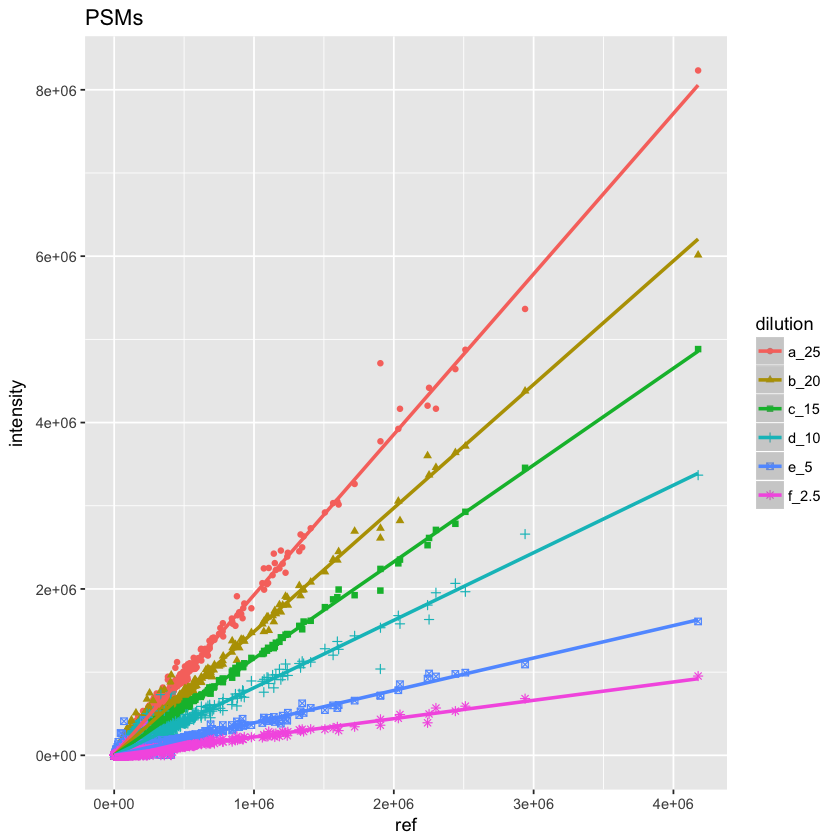

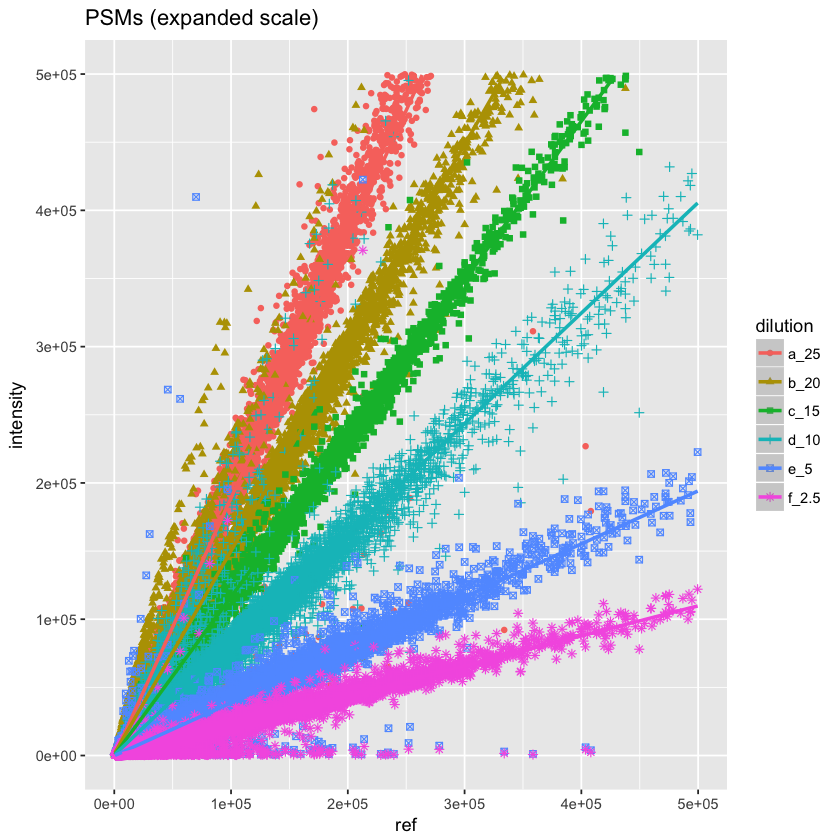

In [5]:
ggplot(data = gpsms, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) +
  geom_smooth(aes(color = dilution), method = "lm") +
  ggtitle("PSMs")

# expanded scale
ggplot(data = gpsms, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  xlim(c(0, 500000)) + ylim(c(0, 500000)) +
  ggtitle("PSMs (expanded scale)")

## Peptides next
These have been filtered some. Matches to contaminants and decoy have been removed. We have done parsimonious protein inference and an additional protein grouping step. Shared and unique peptide status were determined from the final list of reported proteins. Any shared peptides have been excluded. 

Warning message:
“Removed 1259 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1259 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_smooth).”

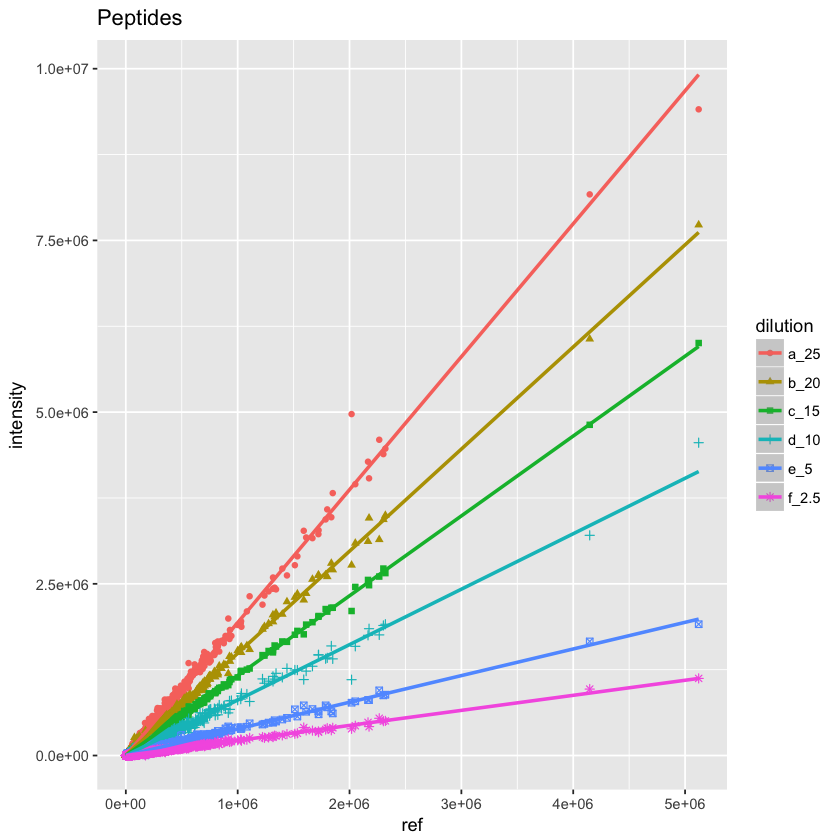

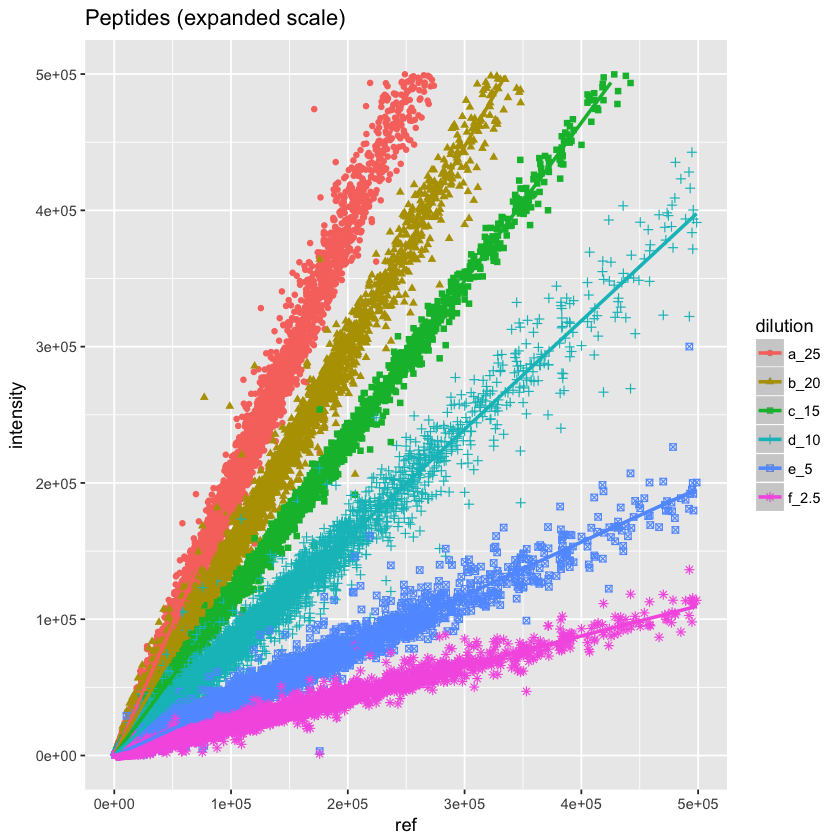

In [6]:
ggplot(data = gpeptides, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  ggtitle("Peptides")

# expanded scale
ggplot(data = gpeptides, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  xlim(c(0, 500000)) + ylim(c(0, 500000)) +
  ggtitle("Peptides (expanded scale)")

## Finally, the proteins
Like the peptides, any contaminants and decoy proteins have been excluded. The protein totals only include unique peptides. Zero values were replaced by a value of 50.

Warning message:
“Removed 1745 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1745 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_smooth).”

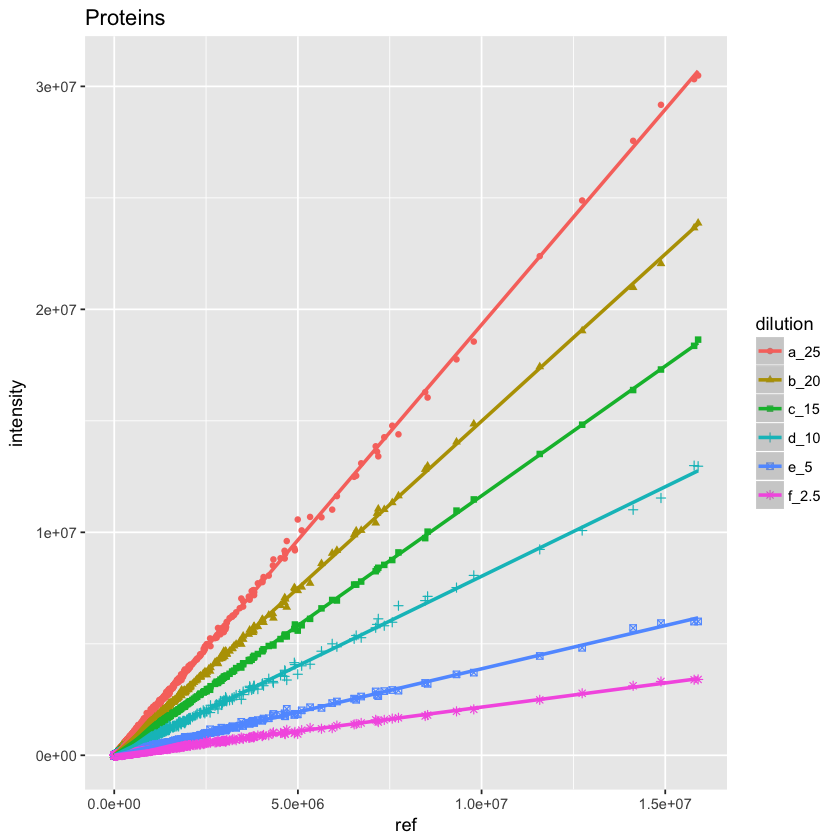

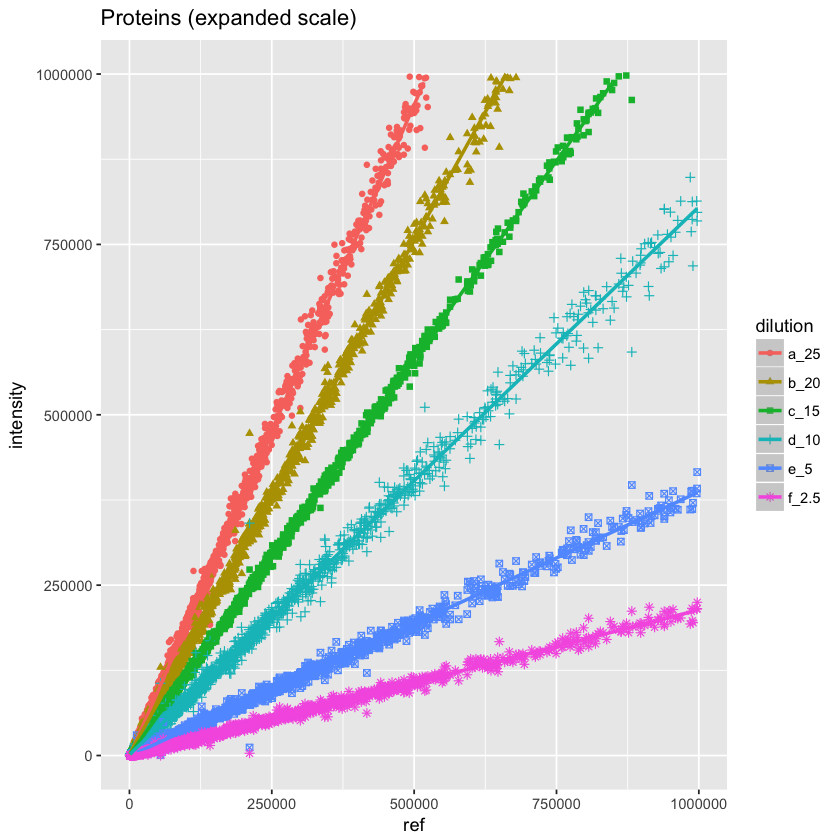

In [7]:
ggplot(data = gproteins, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  ggtitle("Proteins")

# expanded scale
ggplot(data = gproteins, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  xlim(c(0, 1000000)) + ylim(c(0, 1000000)) +
  ggtitle("Proteins (expanded scale)")

## Based on the dilution factors, scale the data to a common scale and compute CVs for PSMs, peptides, and proteins
We know the expected dilution factors and could adjust by those. We can also take the column totals and adjust by the ratio of those. The later was done to put all 6 channels on a similar scale, and the coefficients of variance (CVs) were computed. We will print out the distribution summaries and compare boxplots.

In [8]:
# define a function for scaling data and computing CVs
temp <- psms[1:6]
compute_cv <- function(temp) {
  middle <- c(25, 20, 15, 10, 5, 2.5)
  middle <- c(22.26, 17.60, 13.56, 9.43, 4.50, 2.50)
  average <- mean(middle)
  temp[1] <- temp[1] * average/middle[1]
  temp[2] <- temp[2] * average/middle[2]
  temp[3] <- temp[3] * average/middle[3]
  temp[4] <- temp[4] * average/middle[4]
  temp[5] <- temp[5] * average/middle[5]
  temp[6] <- temp[6] * average/middle[6]
  cv <- 100 * apply(temp, 1, sd) / rowMeans(temp)
}

# compute the CVs and look at the distributions
summary(compute_cv(psms[1:6]))
summary(compute_cv(peptides[1:6]))
summary(compute_cv(proteins[1:6]))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.6485   8.0906  13.5932  18.0421  23.7901 241.4417 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.924   6.961  11.087  14.194  19.117 164.100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.444   3.613   6.467  12.097  13.295 143.706 

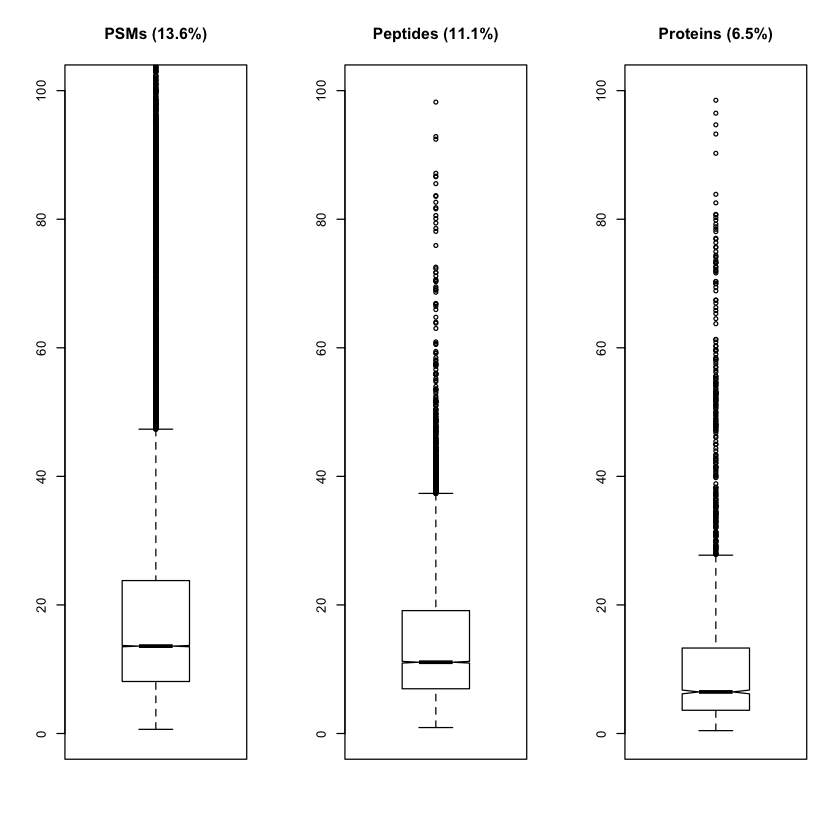

In [9]:
# compare some box plots of the CV distributions
par(mfrow = c(1, 3))
boxplot(compute_cv(psms[1:6]), notch = TRUE, ylim = c(0, 100), main = "PSMs (13.6%)")
boxplot(compute_cv(peptides[1:6]), notch = TRUE, ylim = c(0, 100), main = "Peptides (11.1%)")
boxplot(compute_cv(proteins[1:6]), notch = TRUE, ylim = c(0, 100), main = "Proteins (6.5%)")
par(mfrow = c(1, 1))

## Conclusions
Protein intensities have smaller variances (tighter scatter plots and reduced CVs) and increased dynamic 
range compared to PSM or peptide level measures. There is also a dramatic reduction in the number of data 
points. Proteins are 22-fold fewer than PSMs and almost 8-fold fewer than peptides. Summing filtered PSM 
reporter ions into protein totals is a simple and effective way to aggregate TMT data. This was first described 
in the Compass paper from the Coon lab:

> Wenger, C.D., Phanstiel, D.H., Lee, M., Bailey, D.J. and Coon, J.J., 2011. COMPASS: A suite of pre‐and post‐search proteomics software tools for OMSSA. Proteomics, 11(6), pp.1064-1074.
